In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
df = pd.read_csv('dataR2.csv')
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
print('X.shape:', X.shape)
print('y.shape:', y.shape)
feature_names = df.columns[:-1]
target_names = ['Healthy controls', 'Patients']

X.shape: (116, 9)
y.shape: (116,)


In [189]:
shuffled_df = df.sample(frac=1)
def draw_one_f_plot(feature1):
    for c in range(1, 3):
        #print(df[y == c].index)
        plt.plot(shuffled_df[y == c].index, X[y == c, feature1], 'rbg'[c-1] + 'o', label= target_names[c-1])
    plt.xlabel("Index")
    plt.ylabel(feature_names[feature1])
    plt.grid()
    plt.legend()

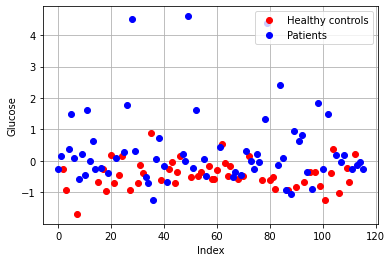

In [206]:
draw_one_f_plot(2)

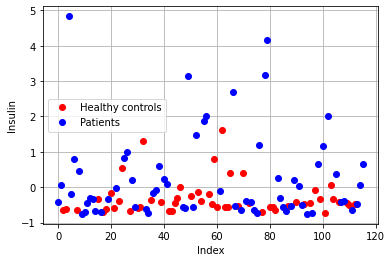

In [207]:
draw_one_f_plot(3)

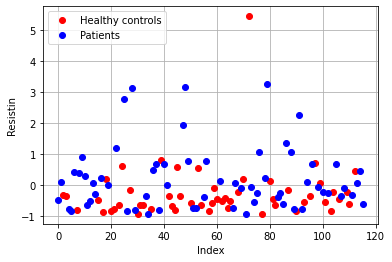

In [212]:
draw_one_f_plot(7)

In [140]:
def draw_features_plot(feature1, feature2):
    for c in range(1, 3):
        plt.plot(X[y == c, feature1], X[y == c, feature2], 'rbg'[c-1] + 'o', label= target_names[c-1])
    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.grid()
    plt.legend()

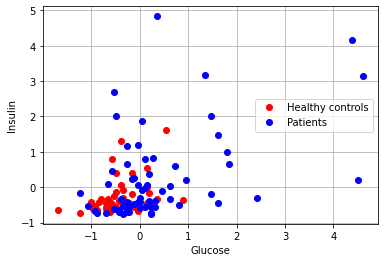

In [213]:
feature1 = 2
feature2 = 3
draw_features_plot(feature1, feature2)

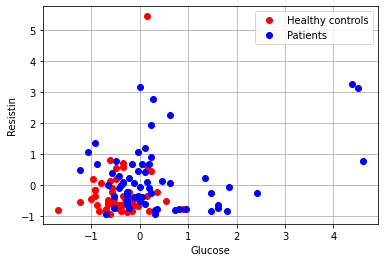

In [215]:
draw_features_plot(2, 7)

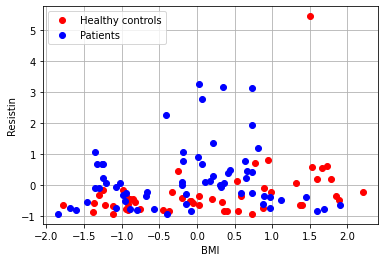

In [291]:
draw_features_plot(1, 7)

In [120]:
# Normalization
X = (X - X.mean(axis=0))/ X.std(axis=0)
print(X)

[[-0.57979363 -0.81667527 -1.23922225 ... -0.07022151 -0.54551749
  -0.34125061]
 [ 1.60182096 -1.37875056 -0.25829943 ... -0.69734988 -0.86421418
  -0.1912238 ]
 [ 1.53948912 -0.89176446 -0.30288683 ...  1.79799836 -0.4416602
   0.05821407]
 ...
 [ 0.47984774  0.89385486 -0.03536242 ...  1.81384272 -0.3563202
  -0.64049127]
 [ 0.91617066 -0.39854568 -0.70417344 ...  3.45903808 -0.92857684
  -0.41283214]
 [ 1.7888165  -0.0804471   1.79272102 ...  0.57664406 -0.84103616
  -1.29074683]]


In [121]:
# k fold cross validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)
for train, test in kf.split(X):
    print("%s %s" % (train, test)) 

[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36  37  39
  40  41  43  45  46  47  48  49  50  51  52  55  57  59  60  61  62  63
  64  66  67  68  70  71  72  74  75  76  77  79  81  82  83  84  85  86
  87  88  89  90  91  92  93  98 100 101 103 105 106 107 108 110 111 112
 113 115] [  2  17  35  38  42  44  53  54  56  58  65  69  73  78  80  94  95  96
  97  99 102 104 109 114]
[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  34  35  37  38  41  42  43  44
  45  47  49  50  51  52  53  54  56  57  58  60  61  62  63  64  65  68
  69  70  71  72  73  74  75  76  78  79  80  81  84  85  86  87  89  90
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114] [ 10  19  27  31  32  33  36  39  40  46  48  55  59  66  67  77  82  83
  88  91  92  93 115]
[  0   1   2   3   5   6   7   8   9  10  11  12  13

In [122]:
model_accuracy = {}

In [123]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
model_accuracy['logistic regression'] = np.mean(scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.776 (0.072)


In [124]:
# SVM with linear kernel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model = SVC(kernel='linear')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
model_accuracy['SVM with linear kernel'] = np.mean(scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.733 (0.105)


In [125]:
# SVM with rbf kernel
model = SVC(kernel='rbf')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
model_accuracy['SVM with rbf kernel'] = np.mean(scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.750 (0.085)


In [126]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
model_accuracy['Decision tree'] = np.mean(scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.690 (0.083)


In [127]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

K = []
Accuracy = []
scores_dict = {}
for k in range(2, 21):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
    acc = np.mean(scores)
    Accuracy.append(acc)
    K.append(k)
    scores_dict[k] = acc

In [128]:
import operator
print('K , test score')
for k, v in scores_dict.items():
    print(k, ':', v)
# get max acc
best_k = max(scores_dict.items(), key=operator.itemgetter(1))[0]
print('Best value for k: {}'.format(best_k))
model_accuracy['KNN'] = scores_dict[best_k]

K , test score
2 : 0.6728260869565218
3 : 0.7757246376811594
4 : 0.733695652173913
5 : 0.7760869565217391
6 : 0.7760869565217391
7 : 0.7496376811594203
8 : 0.7159420289855072
9 : 0.7242753623188406
10 : 0.7329710144927537
11 : 0.7242753623188405
12 : 0.7420289855072463
13 : 0.7155797101449275
14 : 0.7079710144927537
15 : 0.6902173913043479
16 : 0.6989130434782609
17 : 0.6985507246376811
18 : 0.7159420289855072
19 : 0.6981884057971015
20 : 0.6898550724637681
Best value for k: 5


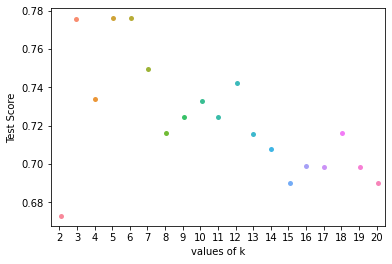

In [129]:
ax = sns.stripplot(K, list(scores_dict.values()));
ax.set(xlabel ='values of k', ylabel ='Test Score')  
plt.show()

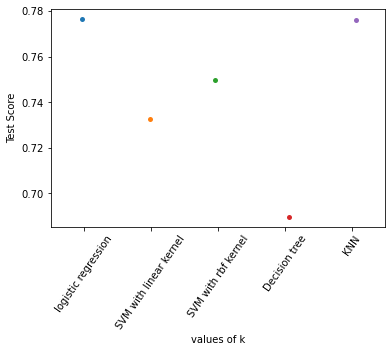

In [130]:
ax = sns.stripplot(list(model_accuracy.keys()), list(model_accuracy.values()));
ax.set(xlabel ='values of k', ylabel ='Test Score')  
plt.xticks(rotation=55)
plt.show()

In [131]:
best_model = max(model_accuracy.items(), key=operator.itemgetter(1))[0]
print('The {} model had the best accuracy of {}'.format(best_model, model_accuracy[best_model]))

The logistic regression model had the best accuracy of 0.7764492753623188
